## Predicting Employee Productivity

The garment industry is one of the key examples of the industrial globalization of the modern era.

It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.

So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.

## Data Dictionary
* `date`: Date in MM-DD-YYYY
* `day`: Day of the Week
* `quarter`: A portion of the month. A month was divided into four quarters
* `department`: Associated department with the instance
* `team_no`: Associated team number with the instance
* `no_of_workers`: Number of workers in each team
* `no_of_style_change`: Number of changes in the style of a particular product
* `targeted_productivity`: Targeted productivity set by the Authority for each team for each day.
* `smv`: Standard Minute Value, it is the allocated time for a task
* `wip`: Work in progress. Includes the number of unfinished items for products
* `over_time`: Represents the amount of overtime by each team in minutes
* `incentive`: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* `idle_time`: The amount of time when the production was interrupted due to several reasons
* `idle_men`: The number of workers who were idle due to production interruption
* `actual_productivity`: The actual % of productivity that was delivered by the workers. It ranges from 0-1.

### Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Part 1: Data Exploration

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')

df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.shape

(1197, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### 1.1 Checking for missing values

In [5]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Only 1 column has missing values and the number of missing values is really significant, about half of the column is missing.

### 1.2: Inspecting columns

In [6]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [7]:
df.select_dtypes(include='O').describe()

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,3,6
top,3/11/2015,Quarter1,sweing,Wednesday
freq,24,360,691,208


The date column is stored as a string, this will need to be converted to datetime dtype.

In [8]:
df.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

The data dictionary mentioned that the `quarter` column splits each month into 4 quarters, but we have 5 quarters here. This will investigated further.

After closely examining the `Quarter` column, I observed that each quarter contains data for one week in a month. This means that quarter1 contains data for the first week in a month, quarter2 contain data for the second week, and so on. But quarter5 contains data for only 29th and 31st of each month.

With this observation, we can merge Quarter5 to Quarter4 and rename the categories to something that better explains what they represent like; first_week, second_week, third_week and fourth_week.

In [9]:
df.day.value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

Friday is missing from the `Day` column, this probably means that the factory doesn't open on fridays.

In [10]:
df.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [11]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

'finishing' is recorded twice in the `department column.` This is obviously some sort of mistake, which is because one of the entries has an extra space.

In [12]:
df.team.value_counts().sort_index()

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

The `team` column appears to be a numerical column, but it's actually categorical, because from the data dictionary, this is simply the number of teams in the factory.

And the `no_of_workers` column records the number of workers in each team. This column should be converted to int because it represents number of people.

In [13]:
df['no_of_workers'].value_counts(bins=8)

(1.9120000000000001, 12.875]    416
(56.375, 67.25]                 410
(45.5, 56.375]                  150
(23.75, 34.625]                 117
(12.875, 23.75]                  82
(34.625, 45.5]                   21
(78.125, 89.0]                    1
(67.25, 78.125]                   0
Name: no_of_workers, dtype: int64

In [14]:
df[['over_time', 'incentive']].describe()

,over_time,incentive
count,1197.000000,1197.000000
mean,4567.460317,38.210526
std,3348.823563,160.182643
min,0.000000,0.000000
25%,1440.000000,0.000000
50%,3960.000000,0.000000
75%,6960.000000,50.000000
max,25920.000000,3600.000000


The `over_time` column tells us that employers often work over time with a medain of 3960 minutes (which is 66 hrs).

Also, the `incentive` column represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action. But we can see that most of the time, workers were not given any incentives.

In [15]:
df[['idle_time', 'idle_men']].describe()

,idle_time,idle_men
count,1197.000000,1197.000000
mean,0.730159,0.369256
std,12.709757,3.268987
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,300.000000,45.000000


The `idle_time` column records the amount of time when the production was interrupted due to several reasons, while `idle_men` is the number of workers who were idle due to production interruption.

From the above table, we can see that idle times in the factory were very rare. Meaning that production was very rarely interrupted. 

In [16]:
df['no_of_style_change'].value_counts(normalize=True)*100

0    87.719298
1     9.523810
2     2.756892
Name: no_of_style_change, dtype: float64

No surprises that there were rarely any style changes in a product becuase this seems like a very efficient and well-managed factory. 

We also see that there is very little variation in this column, meaning that it may not be very useful in the predictions. 

Next, we examine the `targeted_productivity` and `actual_productivity` columns.

The `targeted_productivity` column tells us the productivity target set by the factory management for each day, while the `actual_productivity` column records the actual productivity achieved by the factory workers for the day. 

Also, from the data dictionary, we saw that values in the `actual_productivity` column range from 0 to 1 

In [17]:
df[['targeted_productivity','actual_productivity']].describe()

,targeted_productivity,actual_productivity
count,1197.000000,1197.000000
mean,0.729632,0.735091
std,0.097891,0.174488
min,0.070000,0.233705
25%,0.700000,0.650307
50%,0.750000,0.773333
75%,0.800000,0.850253
max,0.800000,1.120437


The summary statistics of these 2 column tells us that the workers almost aways meet their target for the day. However, we can still inspect the data for more details.

According to the data dictionary, values in the `actual_productivity` column range from 0 to 1, which means that the max values should be 1, but this is clearly not the case.

In [18]:
target_equal_actual = len(df[df['targeted_productivity'] == df['actual_productivity']])
actual_greater_than_target = len(df[df['targeted_productivity'] < df['actual_productivity']])
actual_less_than_target = len(df[df['targeted_productivity'] > df['actual_productivity']])

print(f"Targeted productivity equals actual productivity in {target_equal_actual} occasions\n")
print(f"Actual productivity is greater than targeted productivity in {actual_greater_than_target} occasions\n")
print(f"Actual productivity is less than targeted productivity in {actual_less_than_target} occasions")

Targeted productivity equals actual productivity in 6 occasions

Actual productivity is greater than targeted productivity in 869 occasions

Actual productivity is less than targeted productivity in 322 occasions


Despite being very productive, there's a significant number of times where the workers did not meet their target for the day. 

In [19]:
df.wip.value_counts(dropna=False)

NaN       506
1039.0      5
1282.0      4
1422.0      3
1216.0      3
         ... 
1635.0      1
1519.0      1
1337.0      1
1118.0      1
914.0       1
Name: wip, Length: 549, dtype: int64

I will drop the `wip` column because it contain too many missing values.

## Part 2: Data Cleaning & Preprocessing

### 2.1: Clean the Department column

In [20]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [21]:
mapping_dict = {'sweing':'sweing', 'finishing ':'finishing', 'finishing':'finishing'}

df['department'] = df['department'].map(mapping_dict)

In [22]:
df.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

### 2.2: Clean the Quarters column

In [23]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [24]:
mapping_dict = {'Quarter1':'week_1', 'Quarter2':'week_2', 'Quarter3':'week_3', 'Quarter4':'week_4', 'Quarter5':'week_4'}
df['quarter'] = df['quarter'].map(mapping_dict)

df['quarter'].value_counts()

week_1    360
week_2    335
week_4    292
week_3    210
Name: quarter, dtype: int64

### 2.3: Drop irrelevant columns

While exploring the data, I observed that some columns in the dataset need to be dropped either because they have very little variation (like the 'incentive', 'idle_time', 'idle_men','no_of_style_change') or because the information they contain will not be very useful for our model (like the 'date' column because how it's structured)

I will also drop the 'wip' column because almost have the values are missing.

In [25]:
# Dropping irrelevant columns
df.drop(columns=['date', 'wip', 'incentive', 'idle_time', 'idle_men','no_of_style_change'], axis=1, inplace=True)

df.head(3)

,quarter,department,day,team,targeted_productivity,smv,over_time,no_of_workers,actual_productivity
0,week_1,sweing,Thursday,8,0.80,26.16,7080,59.0,0.940725
1,week_1,finishing,Thursday,1,0.75,3.94,960,8.0,0.886500
2,week_1,sweing,Thursday,11,0.80,11.41,3660,30.5,0.800570


### 2.4: Change data format

In [26]:
# Convert to integer
df['no_of_workers'] = df['no_of_workers'].astype(int)

# Convert team column to categorical
mapping_dict = {8:'team_8',  1:'team_1', 11:'team_11', 12:'team_12',  6:'team_6',  
                7:'team_7', 2:'team_2',  3:'team_3',  9:'team_9', 10:'team_10',  5:'team_5',  4:'team_4'}

df['team'] = df['team'].map(mapping_dict)
df['team'].value_counts()

team_8     109
team_2     109
team_1     105
team_4     105
team_9     104
team_10    100
team_12     99
team_7      96
team_3      95
team_6      94
team_5      93
team_11     88
Name: team, dtype: int64

### 2.5: Create the Target Column

Since we want to predict employer productivity, the target column should be binary with True and False values. 

This is akin to answering the question; were employers productive today? True or False.

For this, I'll create a new column wil answers this question for the dataset. The column will contain a 'True' value for days were the employers'productivity matched or surpassed the target productivity, and a 'False' value for days were employer's productivity was less than target productivity.

In [27]:
df['productive'] = df["actual_productivity"] >= df["targeted_productivity"]

df.head(3)

,quarter,department,day,team,targeted_productivity,smv,over_time,no_of_workers,actual_productivity,productive
0,week_1,sweing,Thursday,team_8,0.80,26.16,7080,59,0.940725,True
1,week_1,finishing,Thursday,team_1,0.75,3.94,960,8,0.886500,True
2,week_1,sweing,Thursday,team_11,0.80,11.41,3660,30,0.800570,True


### 2.6: Encoding Categorical Values

In [28]:
# Create dummy variables
df = pd.get_dummies(df, drop_first=True, dtype=int, prefix=[None, 'department', 'day', None])
pd.set_option('display.max_columns', None)

df.sample(5)

,targeted_productivity,smv,over_time,no_of_workers,actual_productivity,productive,week_2,week_3,week_4,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,team_10,team_11,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9
729,0.35,11.41,3240,52,0.507903,True,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
402,0.70,22.94,10260,57,0.800644,True,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
625,0.70,3.94,1200,10,0.847100,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
684,0.75,10.05,0,54,0.750648,True,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1140,0.75,18.79,6240,52,0.750396,True,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Part 3: Model Training

### 3.1: Training a Baseline Model

I decided to use Logistic regression as the baseline model.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the data
X = df.drop(['actual_productivity','productive'], axis=1)
y = df['productive']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a logistic regression model
lr_clf = LogisticRegression(max_iter=100, random_state=42)

# train the model on training dataset
lr_clf.fit(X_train, y_train)

# get accuracy score on test set
lr_clf.score(X_test, y_test)

0.7472222222222222

### 3.2: Training a Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Load the data
X = df.drop(['actual_productivity','productive'], axis=1)
y = df['productive']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create dummy classifier
rf_clf = RandomForestClassifier()

# Train a model
rf_clf.fit(X_train, y_train)

# Evaluate performance
y_pred_train = rf_clf.predict(X_train)
print("Accuracy on train data:", round(accuracy_score(y_train,y_pred_train), 2))

y_pred = rf_clf.predict(X_test)
print("Accuracy on test data:", round(accuracy_score(y_test,y_pred), 2))

print("\nF1 Score of train data:", round(f1_score(y_train, y_pred_train), 2))
print("F1 Score of test data:", round(f1_score(y_test, y_pred), 2))

Accuracy on train data: 1.0
Accuracy on test data: 0.79

F1 Score of train data: 1.0
F1 Score of test data: 0.87


### 3.3: Hyperparameter Optimization

In [130]:
# Load the data
X = df.drop(['actual_productivity','productive'], axis=1)
y = df['productive']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create dummy classifier
rf_clf2 = RandomForestClassifier(n_estimators=250, random_state=1, max_depth=6, bootstrap=True, max_samples=450, max_features=5, min_samples_leaf=2)

# Train a model
rf_clf2.fit(X_train, y_train)

# Evaluate performance
y_pred_train = rf_clf2.predict(X_train)
print("Accuracy on train data:", round(accuracy_score(y_train,y_pred_train), 2))

y_pred = rf_clf2.predict(X_test)
print("Accuracy on test data:", round(accuracy_score(y_test,y_pred), 2))

print("\nF1 Score of train data:", round(f1_score(y_train, y_pred_train), 2))
print("F1 Score of test data:", round(f1_score(y_test, y_pred), 2))

Accuracy on train data: 0.81
Accuracy on test data: 0.79

F1 Score of train data: 0.88
F1 Score of test data: 0.87


### 3.4: Feature Selection

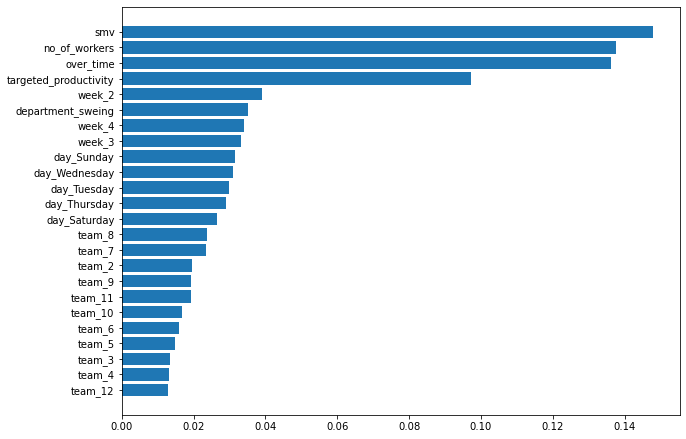

In [137]:
# Feature selection with Embedding method using Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
 
# Load the data
X = df.drop(['actual_productivity','productive'], axis=1)
y = df['productive']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create dummy classifier
et_clf = ExtraTreesClassifier(random_state=24)

# Train a model
et_clf.fit(X_train, y_train)

# Check feature importance # the importance of the features is stored inside the feature_importances_
f_i = list(zip(X_train.columns, et_clf.feature_importances_))
f_i.sort(key = lambda x : x[1])

plt.figure(figsize=(10,7.5))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [148]:
# Load the data
X = df[['smv', 'no_of_workers', 'over_time', 'targeted_productivity', 'department_sweing']]
y = df['productive']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create dummy classifier
rf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=13, bootstrap=True, max_samples=450, max_features=3, min_samples_leaf=2)

# Train a model
rf.fit(X_train, y_train)

# Evaluate performance
y_pred_train = rf.predict(X_train)
print("Accuracy on train data:", round(accuracy_score(y_train,y_pred_train), 2))

y_pred = rf.predict(X_test)
print("Accuracy on test data:", round(accuracy_score(y_test,y_pred), 2))

print("\nF1 Score of train data:", round(f1_score(y_train, y_pred_train), 2))
print("F1 Score of test data:", round(f1_score(y_test, y_pred), 2))

Accuracy on train data: 0.87
Accuracy on test data: 0.83

F1 Score of train data: 0.92
F1 Score of test data: 0.89


### 3.5: Evaluating Model Performance

In [149]:
confusion_matrix(y_test, y_pred)

array([[ 49,  43],
       [ 18, 250]], dtype=int64)

**[[True Negatives, False Positives],**

**[False Negatives, True Positives]]**

We can further evaluate our model performance with cross validation.

In [150]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2)) 

Cross Validation Accuracy Scores: [0.81 0.85 0.83 0.78 0.77 0.75 0.7  0.82 0.82 0.7 ]


In [155]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score

# Perform 5-fold cross-validation
cv_results = cross_validate(rf, X, y, cv=10, scoring=("precision", "recall", "f1"))

# Print the results
print(cv_results)

{'fit_time': array([0.19383788, 0.12935257, 0.12426233, 0.12856174, 0.15269971,
       0.15488696, 0.1305356 , 0.13428879, 0.1367414 , 0.14085484]), 'score_time': array([0.01676822, 0.0167098 , 0.01056957, 0.01206374, 0.01519918,
       0.01504588, 0.01564622, 0.01598859, 0.01370716, 0.01647329]), 'test_precision': array([0.84946237, 0.85      , 0.84      , 0.7961165 , 0.8       ,
       0.76635514, 0.75247525, 0.84946237, 0.83505155, 0.81481481]), 'test_recall': array([0.89772727, 0.96590909, 0.95454545, 0.93181818, 0.90909091,
       0.94252874, 0.87356322, 0.90804598, 0.93103448, 0.75862069]), 'test_f1': array([0.87292818, 0.90425532, 0.89361702, 0.85863874, 0.85106383,
       0.84536082, 0.80851064, 0.87777778, 0.88043478, 0.78571429])}


In [156]:
print(f"F1 Scores:{cv_results['test_f1'].round(2)}")
print(f"\nRecall Scores:{cv_results['test_recall'].round(2)}")
print(f"\nPrecision Scores:{cv_results['test_precision'].round(2)}")

F1 Scores:[0.87 0.9  0.89 0.86 0.85 0.85 0.81 0.88 0.88 0.79]

Recall Scores:[0.9  0.97 0.95 0.93 0.91 0.94 0.87 0.91 0.93 0.76]

Precision Scores:[0.85 0.85 0.84 0.8  0.8  0.77 0.75 0.85 0.84 0.81]


## Conclusion

This project focused on analyzing and predicting the productivity performance of working teams within a garment factory. I began with comprehensive data exploration and analysis, followed by building classification models aimed at predicting daily employee productivity.

I first built a baseline model with Logistic Regression, which achieved an accuracy of 74.7% on the test dataset. Transitioning to a more complex Random Forest Classification model, the accuracy improved to 79%. 

I worked on improving the Random Forest model by adjusting hyperparameters and picking out the most important features. This brought the model accuracy up even higher to 83% on the test data. This shows how fine-tuning the model makes a big difference in how well it can predict things.